## Nonlinear Relationships

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = boston_data.target

In [5]:
df_boston  = pd.read_csv('data//housing.data', header=None)
col_name=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

### Brief Introduction to Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
X = df[['LSTAT']].values

In [8]:
tree = DecisionTreeRegressor(max_depth=5)

In [9]:
tree.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [10]:
sort_idx = X.flatten().argsort()

Text(0, 0.5, 'MEDV')

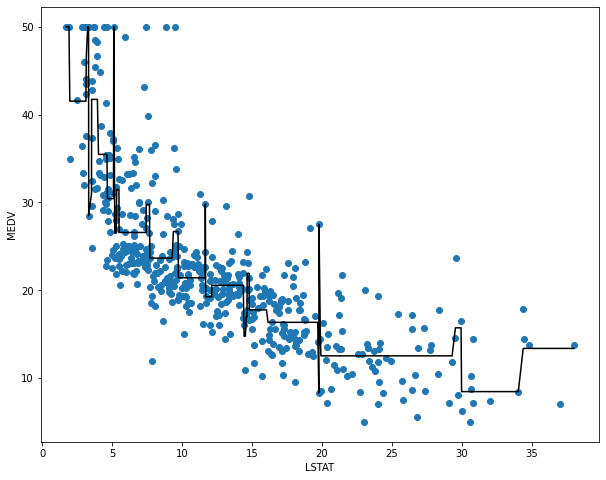

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color = 'k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

***

Using max_depth of 5 led to averfitting. Let's try 2 instead.

Text(0, 0.5, 'MEDV')

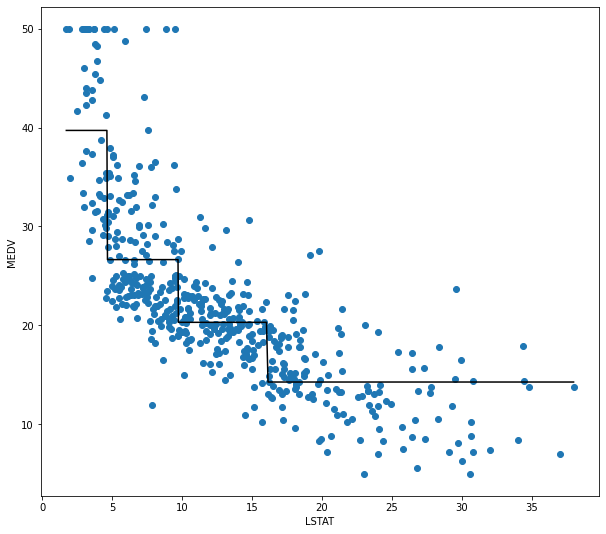

In [12]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X,y)
sort_idx = X.flatten().argsort()

plt.figure(figsize=(10,9))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

## Brief Introduction to Random Forest

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = df.values
#y = df['MEDV'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
forest = RandomForestRegressor(n_estimators = 500, criterion = 'mse', random_state = 42, n_jobs=-1)

In [18]:
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [19]:
y_train_pred = forest.predict(X_train)

In [20]:
y_test_pred = forest.predict(X_test)

In [21]:
print("MSE traing: {0:.4}f, test {1:.4}f".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE traing: 1.875f, test 9.326f


In [22]:
print("R^2 traing: {0:.4}f, test {1:.4}f".format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 traing: 0.9787f, test 0.8748f


### Brief Introduction to AdaBoost

In [24]:
from sklearn.ensemble import AdaBoostRegressor

In [25]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators = 500, random_state = 42)

In [26]:
ada.fit (X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [27]:
y_train_pred = ada.predict(X_train)

In [29]:
y_test_pred = ada.predict(X_test)

In [34]:
print("MSE train: {0:.4f}, test: {1:.4f}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 4.4567, test: 13.2427


In [35]:
print("R^2 train: {0:.4f}, test: {1:.4f}".format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.9493, test: 0.8223


### DecisionTree

In [43]:
exTree = DecisionTreeRegressor(max_depth = 3)

In [44]:
exTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [45]:
y_train_pred = exTree.predict(X_train)

In [46]:
y_test_pred = exTree.predict(X_test)

In [47]:
print("MSE train: {0:.4f}, test: {1:.4f}".format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

MSE train: 15.3680, test: 16.9282


In [48]:
print("R^2 train: {0:.4f}, test: {1:.4f}".format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.8252, test: 0.7728


### Revisiting Feature Importance
Wicht feature is more important?

### According to AdaBoost

In [36]:
ada.feature_importances_

array([0.03284169, 0.0017967 , 0.01146074, 0.00209209, 0.03897159,
       0.24219268, 0.01057968, 0.13055771, 0.01554554, 0.02348895,
       0.04072215, 0.02430303, 0.42544745])

In [37]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [38]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [39]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.425447
RM,0.242193
DIS,0.130558
PTRATIO,0.040722
NOX,0.038972
CRIM,0.032842
B,0.024303
TAX,0.023489
RAD,0.015546
INDUS,0.011461


<AxesSubplot:>

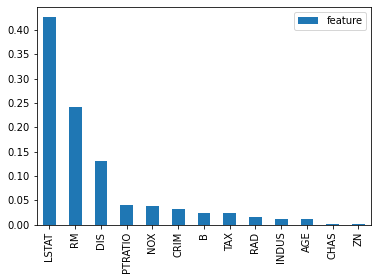

In [40]:
result.sort_values(by='feature', ascending=False).plot(kind='bar')

### Random Forest

In [41]:
forest.feature_importances_

array([0.03204822, 0.00160483, 0.00700703, 0.00125804, 0.01475089,
       0.40389139, 0.01410918, 0.06287534, 0.00515063, 0.01197446,
       0.01821116, 0.01241787, 0.41470096])

<AxesSubplot:>

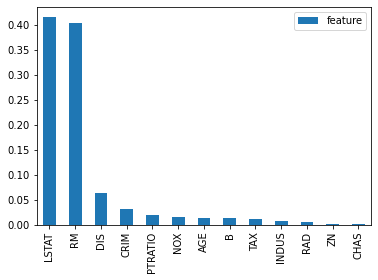

In [42]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar')

### DecisionTree

In [49]:
exTree.feature_importances_

array([0.04799502, 0.        , 0.        , 0.        , 0.        ,
       0.64420336, 0.        , 0.10423915, 0.        , 0.        ,
       0.        , 0.        , 0.20356246])

In [51]:
result = pd.DataFrame(exTree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False)

,feature
RM,0.644203
LSTAT,0.203562
DIS,0.104239
CRIM,0.047995
ZN,0.000000
INDUS,0.000000
CHAS,0.000000
NOX,0.000000
AGE,0.000000
RAD,0.000000


<AxesSubplot:>

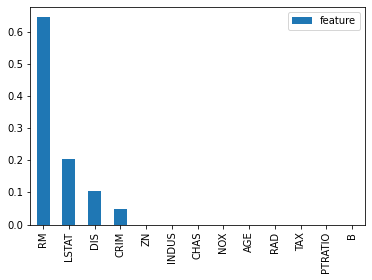

In [52]:
result.sort_values(by='feature', ascending=False).plot(kind='bar')